In [14]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pandas_profiling

C:\Users\arpan\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\arpan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\arpan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\arp

In [3]:
udf = pd.read_csv('users_large.csv')
udf.head()

,gender,dob,location,partner,userId
0,male,1954-01-16 19:00:00,"37.8425606899999991,-85.4842177400000054",NaN,2f557d23b7b24a5c80586b7119b2148c
1,male,1980-07-27 20:00:00,"37.833993424197061,-122.190195647319996",b6599e82c7db42538d376e21c7c01171,75eba68431094c55ae1fba56f8f5b861
2,female,1975-02-11 19:00:00,"57.7414159200000014,12.0753449899999996",c361c367944749f78b09beedce4816db,7fa6c0917f99407eaeda91908fc92235
3,male,1979-07-09 20:00:00,"-33.4293767040255361,-70.5886206036256141",770197a06a4f4b7f97f9a4d1d9a0b405,474db47f079b4b05aefc5989bcd22f62
4,female,1989-08-19 20:00:00,"27.9966092406665794,-82.4493318922714025",af125927d58542b49ab7d47c2b656ea5,7f4bc30054ec4cc58b0311dfc8ff01ab


In [4]:
len(udf)

8967

In [72]:
idf = pd.read_csv('intervals_large.csv')

C:\Users\arpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 09:05:00,92,2017-12-12 23:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 10:58:00,81,2017-12-13 00:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 12:22:00,64,2017-12-12 03:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 11:36:00,62,2017-10-05 00:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 05:44:00,12,2017-10-10 04:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [7]:
len(idf)

1042308

In [16]:
pandas_profiling.ProfileReport(idf)

Number of variables,16
Number of observations,1042308
Total Missing (%),21.9%
Total size in memory,127.2 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [38]:
# data types of all columns in idf dataframe
idf.dtypes.astype(str).to_dict()

{'end_ts': 'datetime64[ns]',
 'score': 'int64',
 'start_ts': 'datetime64[ns]',
 'user_id': 'object',
 'session_duration_seconds': 'object',
 'sleep_duration_seconds': 'object',
 'presence_duration_seconds': 'object',
 'tnt_count': 'float64',
 'avg_bedtemp_c': 'float64',
 'avg_heart_rate': 'float64',
 'avg_resp_rate': 'float64',
 'avg_roomtemp_c': 'float64',
 'deep_duration': 'float64',
 'light_duration': 'float64',
 'rem_duration': 'float64',
 'id': 'object'}

In [73]:
# converting 'end_ts' and 'start_ts' to pandas datetime object

idf['end_ts'] = pd.to_datetime(idf['end_ts'])
idf['start_ts'] = pd.to_datetime(idf['start_ts'])

In [74]:
# Converting the UTC times to the local timezone (New York in this case, which is 4 hours behind UTC)

idf['end_ts'] = idf['end_ts'] - pd.to_timedelta(4, unit='h')
idf['start_ts'] = idf['start_ts'] - pd.to_timedelta(4, unit='h')

In [75]:
idf.head()

,end_ts,score,start_ts,user_id,session_duration_seconds,sleep_duration_seconds,presence_duration_seconds,tnt_count,avg_bedtemp_c,avg_heart_rate,avg_resp_rate,avg_roomtemp_c,deep_duration,light_duration,rem_duration,id
0,2017-12-13 05:05:00,92,2017-12-12 19:26:00,0335d5af35b34bd7a8966f8481c1aba6,"34,020","26,700","34,020",8.0,35.846226,NaN,NaN,NaN,6780.0,19920.0,0.0,"73,556,139"
1,2017-12-13 06:58:00,81,2017-12-12 20:43:00,82b2052ba5dd4779b233af048805272d,"36,060","34,140","35,400",13.0,33.785819,NaN,NaN,NaN,8880.0,25260.0,0.0,"73,556,164"
2,2017-12-12 08:22:00,64,2017-12-11 23:51:00,9cb1ef1ae14948619830f0e956a3379e,"29,940","23,340","27,480",20.0,31.817300,NaN,NaN,NaN,6000.0,17340.0,0.0,"72,827,151"
3,2017-10-05 07:36:00,62,2017-10-04 20:52:00,4f1e86e2192741a08a2716fa2771512a,"37,980","18,000","37,260",6.0,NaN,NaN,NaN,NaN,4440.0,13560.0,0.0,"24,709,302"
4,2017-10-10 01:44:00,12,2017-10-10 00:54:00,26e2a932e4eb49c687706bbe9fd3e69f,"2,880","1,800","2,880",0.0,NaN,NaN,NaN,NaN,0.0,1800.0,0.0,"28,086,254"


In [76]:
idf['user_id'].nunique()

6513

In [77]:
udf['userId'].nunique()

8950

In [81]:
from matplotlib import pyplot
series = idf[['end_ts', 'sleep_duration_seconds']
series.plot()
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-81-d9aba22aa80f>, line 3)

In [93]:
# nidf = idf[idf['light_duration'] != NaN]
# len(nidf)
nidf = idf.dropna()
len(nidf)

8140

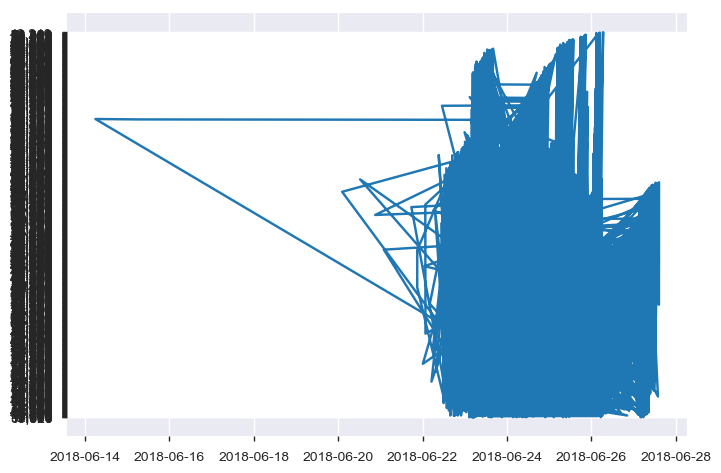

In [94]:
plt.plot(nidf['end_ts'], nidf['sleep_duration_seconds'])